Phần 1: Import các thư viện cần thiết

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

Phần 2: Load và tiền xử lý dữ liệu

Tải tập dữ liệu MNIST và thực hiện các bước tiền xử lý cần thiết như chuẩn hóa dữ liệu và chuyển nhãn sang dạng one-hot.

In [2]:
# 1. Load dữ liệu MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Tiền xử lý dữ liệu
# Chuẩn hóa dữ liệu: đưa pixel về khoảng [0, 1]
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Chuyển nhãn thành dạng one-hot vector
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Kiểm tra kích thước của dữ liệu
print(f"Train data shape: {x_train.shape}, Train labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")

Train data shape: (60000, 28, 28, 1), Train labels shape: (60000, 10)
Test data shape: (10000, 28, 28, 1), Test labels shape: (10000, 10)


Phần 3: Hiển thị một vài hình ảnh từ dữ liệu

Xem qua dữ liệu để hiểu rõ về tập MNIST.

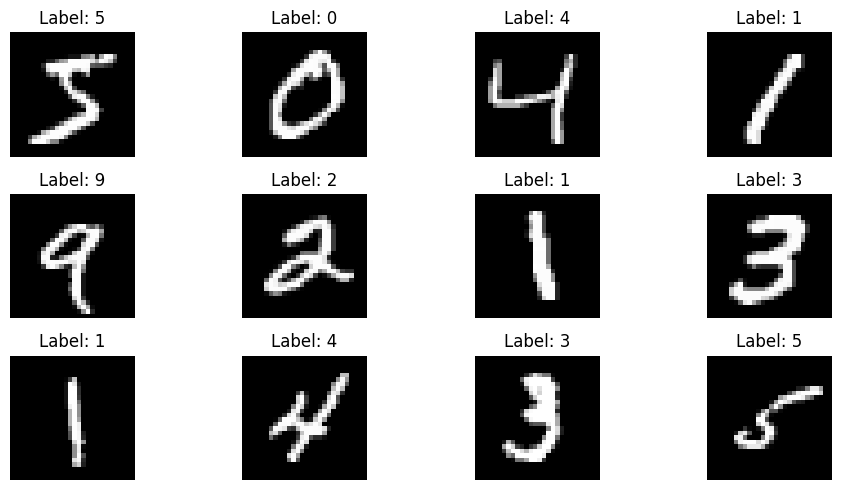

In [3]:
# Hiển thị một số hình ảnh từ tập dữ liệu
plt.figure(figsize=(10, 5))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Phần 4: Xây dựng mô hình CNN

Xây dựng mô hình CNN với các lớp Convolutional, Pooling và Fully Connected.

In [4]:
# Xây dựng mô hình CNN
model = Sequential([
    # Lớp tích chập 1
    Input(shape=(28, 28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Lớp tích chập 2
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten: chuyển dữ liệu thành vector phẳng
    Flatten(),

    # Fully Connected Layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout để tránh overfitting

    # Lớp đầu ra với hàm softmax
    Dense(10, activation='softmax')
])

# Tóm tắt mô hình
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Phần 5: Compile mô hình

Cấu hình hàm mất mát, thuật toán tối ưu và độ đo đánh giá.

In [5]:
# Compile mô hình
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

print("Model compiled successfully!")

Model compiled successfully!


Phần 6: Huấn luyện mô hình

Huấn luyện mô hình trên dữ liệu huấn luyện và đánh giá trên dữ liệu kiểm tra.

In [6]:
# Huấn luyện mô hình
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    epochs=50, batch_size=128)

print("Training complete!")

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - accuracy: 0.8019 - loss: 0.6303 - val_accuracy: 0.9797 - val_loss: 0.0606
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.9670 - loss: 0.1084 - val_accuracy: 0.9860 - val_loss: 0.0420
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9775 - loss: 0.0762 - val_accuracy: 0.9874 - val_loss: 0.0353
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9824 - loss: 0.0561 - val_accuracy: 0.9877 - val_loss: 0.0352
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9852 - loss: 0.0499 - val_accuracy: 0.9896 - val_loss: 0.0287
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9875 - loss: 0.0416 - val_accuracy: 0.9907 - val_loss: 0.0274
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9878 - loss: 0.0380 - val_accuracy: 0.9916 - val_loss: 0.0269
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.9890 - loss: 0.0343 - 

Phần 7: Đánh giá mô hình

Kiểm tra độ chính xác của mô hình trên tập kiểm tra.

In [7]:
# Đánh giá mô hình trên tập kiểm tra
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 - 2s - 6ms/step - accuracy: 0.9940 - loss: 0.0328

Test accuracy: 0.9940
Test loss: 0.0328


Phần 8: Vẽ biểu đồ Accuracy và Loss

Hiển thị biểu đồ để quan sát quá trình huấn luyện.

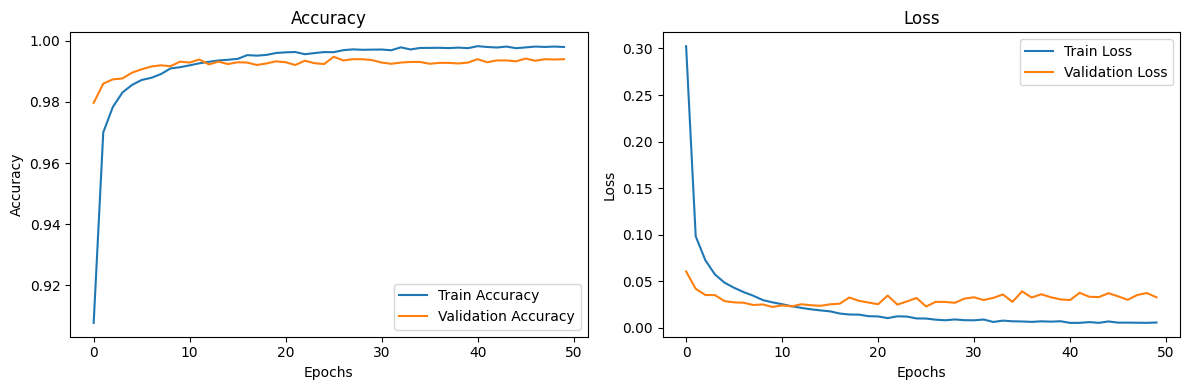

In [8]:
# Vẽ biểu đồ accuracy và loss
plt.figure(figsize=(12, 4))

# Biểu đồ độ chính xác
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Biểu đồ hàm mất mát
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Phần 9: Dự đoán trên hình ảnh mới

Thử dự đoán một vài hình ảnh từ tập kiểm tra để kiểm tra kết quả.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


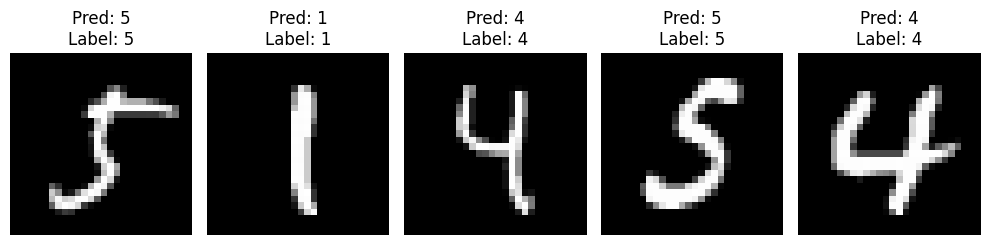

In [9]:
# Lấy ngẫu nhiên 5 hình ảnh từ tập kiểm tra
num_images = 5
indices = np.random.choice(len(x_test), num_images, replace=False)

# Dự đoán và hiển thị kết quả
plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    img = x_test[idx]
    prediction = np.argmax(model.predict(img.reshape(1, 28, 28, 1)))
    label = np.argmax(y_test[idx])

    plt.subplot(1, num_images, i+1)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {prediction}\nLabel: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()